In [4]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt# type: ignore
import pandas as pd # type: ignore



In [5]:
vol = pd.read_csv('voltage vs time (in minutes) Dataset.csv')
curr= pd.read_csv('current vs time (in minutes).csv')
vol.head()



,344.8839062096001,0.005528360511335095
0,344.891695,0.030451
1,344.899483,0.055373
2,344.907271,0.080296
3,344.915059,0.105219
4,344.922848,0.130141


In [6]:
curr.head()

,-0.2843719333484387,0.022604469913037106
0,-2.448998,0.033917
1,-0.281097,0.047491
2,-0.277823,0.072378
3,-2.616149,0.070115
4,-0.274548,0.097264


In [7]:
vol.columns=['voltage','time']
vol.head()

,voltage,time
0,344.891695,0.030451
1,344.899483,0.055373
2,344.907271,0.080296
3,344.915059,0.105219
4,344.922848,0.130141


In [8]:
curr.columns=['current','time']
curr.head()


,current,time
0,-2.448998,0.033917
1,-0.281097,0.047491
2,-0.277823,0.072378
3,-2.616149,0.070115
4,-0.274548,0.097264


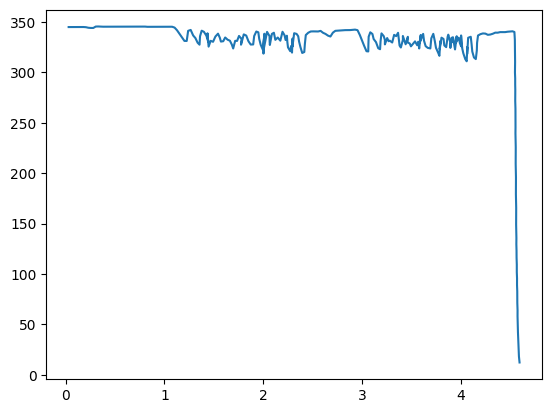

In [9]:
plt.plot(vol['time'],vol['voltage'])
plt.show()

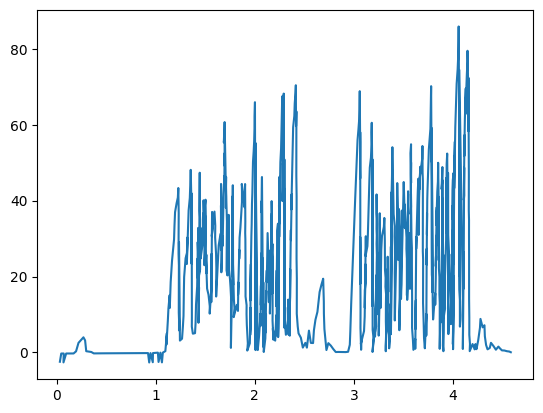

In [10]:
plt.plot(curr['time'],curr['current'])
plt.show()

In [11]:
import numpy as np # type: ignore

In [12]:
import scipy # type: ignore
print(scipy.__version__)

1.11.4


In [13]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline


In [14]:
f1=interp1d(vol['time'],vol['voltage'])

In [15]:
vol.tail()

,voltage,time
296,35.681898,4.578815
297,29.411118,4.580854
298,23.557117,4.583913
299,18.168326,4.586178
300,12.209159,4.592409


In [16]:
print(f1(4.59240))

12.217631129277855


In [17]:
f2=interp1d(curr['time'],curr['current'])

In [18]:
print(curr.tail(),'\n',curr.head())

       current      time
1121  0.547661  4.493139
1122  0.513427  4.518025
1123  0.329160  4.542912
1124  0.238663  4.567799
1125  0.057744  4.582504 
     current      time
0 -2.448998  0.033917
1 -0.281097  0.047491
2 -0.277823  0.072378
3 -2.616149  0.070115
4 -0.274548  0.097264


In [19]:
print(vol.head(),'\n',vol.tail())

      voltage      time
0  344.891695  0.030451
1  344.899483  0.055373
2  344.907271  0.080296
3  344.915059  0.105219
4  344.922848  0.130141 
        voltage      time
296  35.681898  4.578815
297  29.411118  4.580854
298  23.557117  4.583913
299  18.168326  4.586178
300  12.209159  4.592409


In [20]:
t1=0.034
t2=4.58

In [21]:
from scipy.integrate import quad

In [22]:
def product(t):
    return f1(t)*f2(t)

In [23]:
value,error=quad(product,t1,t2) 

C:\Users\sreea\AppData\Local\Temp\ipykernel_7352\1842840528.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  value,error=quad(product,t1,t2)


In [24]:
print(f'Total energy in joules is {value *60}')
kwh=value * 60/(3.6 * 10 ** 6)
print(f'Total energy in kwh is {kwh}')

Total energy in joules is 1409584.0115644238
Total energy in kwh is 0.3915511143234511


In [25]:
vol2 = pd.read_csv('voltage vs time(in minutes) endurance.csv')
curr2= pd.read_csv('current vs time(in minutes) endurance.csv')
print(vol2.head(),'\n',curr2.head())



   0.08998550318735377   366.65571112867576
0             0.135576           366.655711
1             0.181167           366.655711
2             0.226758           366.655711
3             0.272349           366.655711
4             0.317940           366.655711 
    0.02063095955234795   -0.10320802643011007
0             0.066222              -0.103208
1             0.111813              -0.103208
2             0.157404              -0.103208
3             0.202995              -0.103208
4             0.248586              -0.103208


In [26]:
vol2.columns=['voltage','time']
curr2.columns=['current','time']


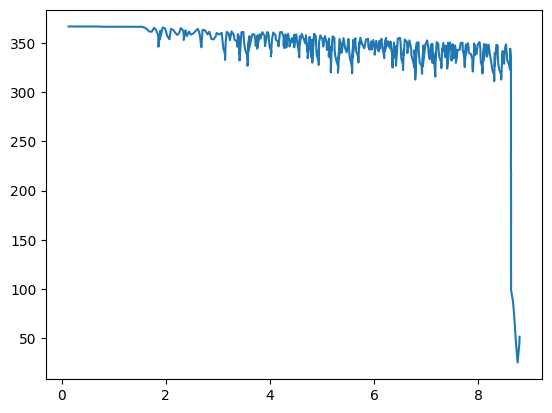

In [27]:
plt.plot(vol2['voltage'],vol2['time'])
plt.show()

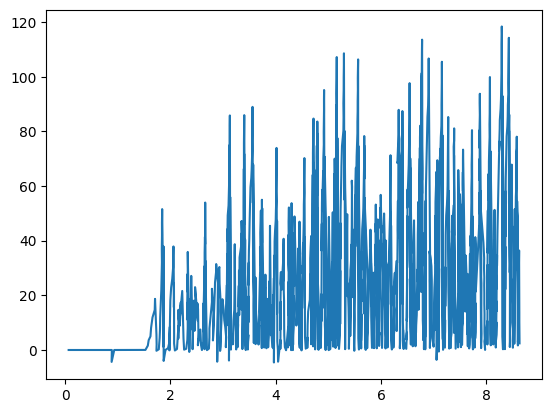

In [28]:
plt.plot(curr2['current'],curr2['time'])
plt.show()

In [29]:
from scipy.interpolate import interp1d
from scipy.integrate import quad  

In [30]:
g1=interp1d(vol2['voltage'],vol2['time'])
g2=interp1d(curr2['current'],curr2['time'])

In [31]:
def product2(t):
    return g1(t)*g2(t)

In [32]:
print(vol2.head(),'\n',vol2.tail())

    voltage        time
0  0.135576  366.655711
1  0.181167  366.655711
2  0.226758  366.655711
3  0.272349  366.655711
4  0.317940  366.655711 
       voltage       time
453  8.736274  37.630408
454  8.744701  31.088994
455  8.756070  25.511852
456  8.790496  45.709445
457  8.792821  51.689091


In [33]:
print(curr2.head(),curr2.tail())

    current      time
0  0.066222 -0.103208
1  0.111813 -0.103208
2  0.157404 -0.103208
3  0.202995 -0.103208
4  0.248586 -0.103208        current       time
1932  8.629028  19.781077
1933  8.629028  16.633924
1934  8.629028  13.486771
1935  8.629028  10.339618
1936  8.633173   2.328683


In [34]:
t1=0.136
t2=8.63
t3=7.1


In [35]:
energy,error=quad(product2,t3,t2)

C:\Users\sreea\AppData\Local\Temp\ipykernel_7352\4271357384.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  energy,error=quad(product2,t3,t2)


In [36]:
print(f'Total energy is {energy * 60}')
print(f'Total energy in kwh is {energy * 60/(3.6 * 10 ** 6)}')


Total energy is 1060600.5114123265
Total energy in kwh is 0.2946112531700907
